In [1]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('../..')))
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from evaluation.denoise import wv_denoise
from lpn_mrs.datasets import MRSDataset

%matplotlib inline

In [3]:
sigmas = [0.05,0.1, 0.15, 0.2]
threshold_factors = np.arange(0.1, 1.1, 0.1)

In [4]:
test_dataset = MRSDataset('../data/', split='validate')
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=False,
    drop_last=False
)

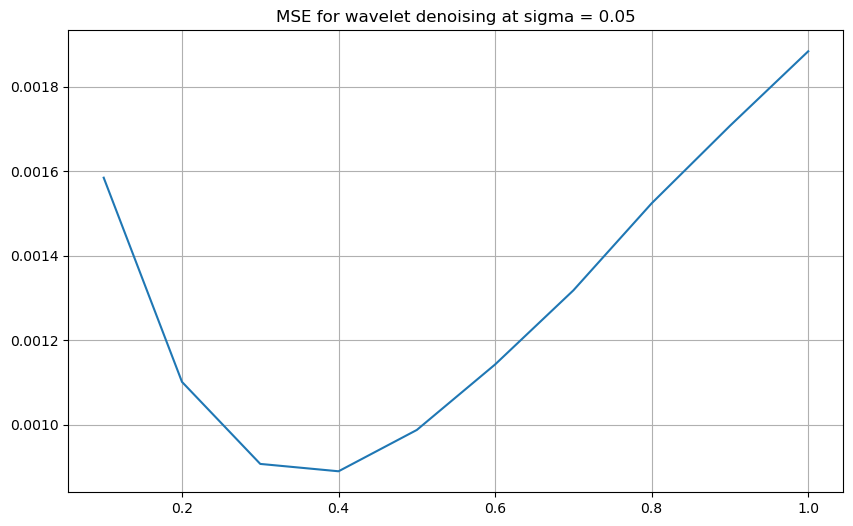

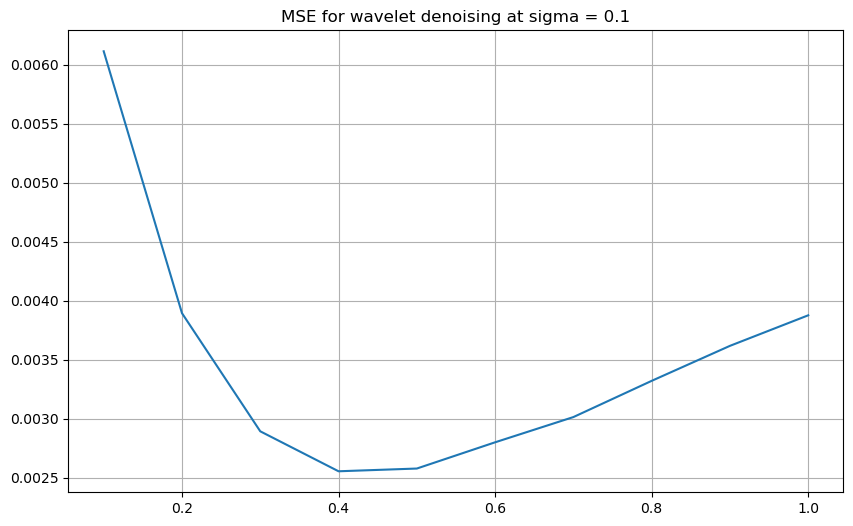

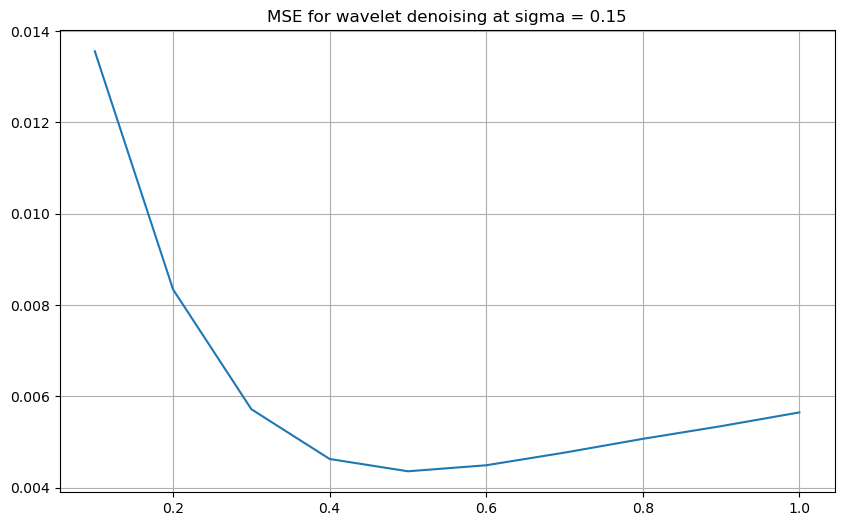

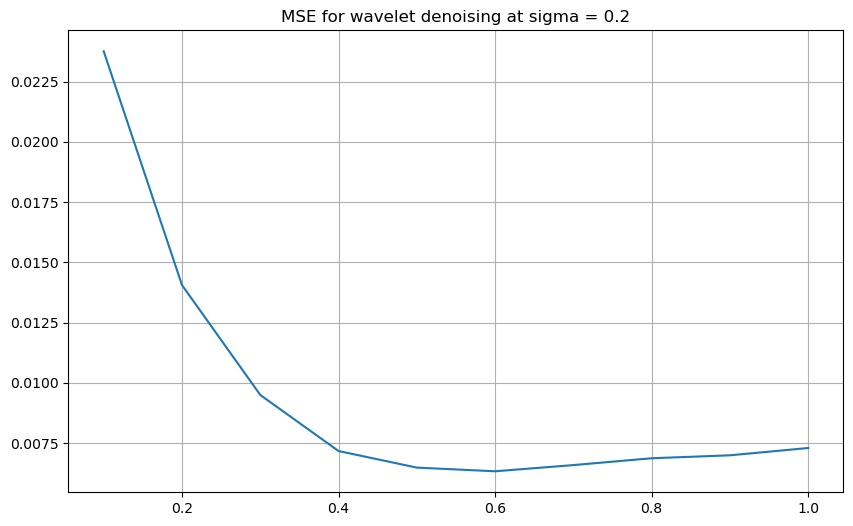

In [5]:
best_threshold = {}
for sigma in sigmas:
    mses_list = []
    for threshold_factor in threshold_factors:
        mean_mse = 0
        for i,x in enumerate(test_dataloader):
            x = x.numpy()
            x_noisy = x + np.random.normal(0,sigma,x.shape)
            x_denoise = wv_denoise(x_noisy, threshold_factor=threshold_factor)

            mean_mse += np.mean((x_denoise - x)**2)
        mean_mse /= len(test_dataloader)
        mses_list.append(mean_mse)
    
    plt.figure(figsize=(10, 6))
    plt.title(f"MSE for wavelet denoising at sigma = {sigma}")
    plt.plot(threshold_factors, mses_list)
    plt.grid()
    plt.show()

    min_id = mses_list.index(min(mses_list))
    best_threshold[sigma] = threshold_factors[min_id]

In [6]:
print(best_threshold)

{0.05: np.float64(0.4), 0.1: np.float64(0.4), 0.15: np.float64(0.5), 0.2: np.float64(0.6)}
